1. Importing and Cleaning Data
https://de.wikipedia.org/wiki/Liste_der_Hochschulen_in_Deutschland

In [6]:
import math
import pandas
dfhs = pandas.read_csv("hochschulen_de_gps.csv",";")
dfhs.head()

hochsch = []

for index, row in dfhs.iterrows():
    #print("%s %f %f" % (row['Name'],row['latitude'],row['longitude']))
    if(not math.isnan(row['latitude'])):
        hochsch.append((row['Name'],row['latitude'],row['longitude']))
    #if(row['latitude'].isnull()):
    #    print("data")

print(hochsch[0])
print(len(hochsch))

('FH Aachen ', 50.75903915000001, 6.082028949780861)
330


2. Plotting Map Data

In [12]:
import folium
from folium.features import DivIcon

world_map = folium.Map(tiles="Stamen Toner",location=[51.3154546,9.4924096],zoom_start=6)
zuHause = folium.map.FeatureGroup()

for i,(name,long,lat) in enumerate(hochsch):

    folium.map.Marker(
    [long,lat],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="color:Blue;font-size: 5px;">'+ str(i)+'</div>',
        )
    ).add_to(zuHause)
    i=i+1
world_map.add_child(zuHause)
world_map.save("hochschulenMap.html")

In [27]:
for i,(name,long,lat) in enumerate(hochsch):
    #print(name[0])
    s = str(name)
    #print(str(i)+ " " + str(s))

In [45]:
x = []
y = []
X = [] #2D
for i,(name,long,lat) in enumerate(hochsch):
    #print("%f %f" % (long,lat))
    x.append(lat)
    y.append(long)
    X.append([lat,long])

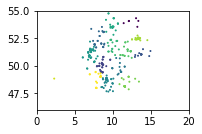

In [49]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

n_samples = 1500
random_state = 170
y_pred = KMeans(n_clusters=16, random_state=random_state).fit_predict(X)
plt.subplot(221)
plt.ylim(46,55)
plt.xlim(0,20)
plt.scatter(x,y,s=1,c=y_pred)
plt.savefig("HochschulenCluster.png",dpi=150)

11.574660
13.345565
7.176199
9.185112
8.626824
9.959580
8.487741
n_cluster=6


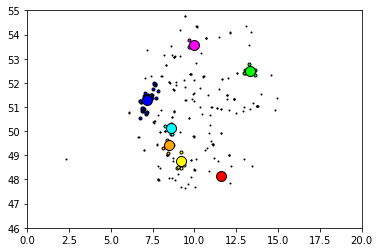

In [140]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_                                
colors = [ (1,0,0),(0,1,0),(0,0,1),(1,1,0),(0,1,1),(1,0,1),(1.0,0.65,0)]                                  

fig, ax = plt.subplots()

n_cluster = max(labels)

plt.ylim(46,55)
plt.xlim(0,20)
for i,label in enumerate(labels):
    if(label==-1):
        plt.plot(x[i],y[i],'o', markerfacecolor=(0,0,0),markeredgecolor='k', markersize=1)
    else:
        plt.plot(x[i],y[i],'o', markerfacecolor=colors[label],markeredgecolor='k', markersize=3)
centers =[(48.1396852909091, 11.574660390561847), (52.49932102857143, 13.345564755162135), (51.30897966022728, 7.176198619610907), (48.761562714285716, 9.18511184298376), (50.11276830416666, 8.626824078393186), (53.554746291176464, 9.959580434405437), (49.41445581538461, 8.487741071794243)]
for i,c in enumerate(centers):
    plt.plot(c[1],c[0],'o', markerfacecolor=colors[i],markeredgecolor='k', markersize=10)
    print("%f" % c[1])
print("n_cluster=%i" % (n_cluster) )
#for n in range(n_cluster+1):
#    print("Cluster " + str(n+1) )
#    for i,label in enumerate(labels):
#        if(label==n):
#            print("\t" + str(hochsch[i][0]))

plt.savefig("HochschulenClusterDBScan.png",dpi=150)

In [134]:
print("n_cluster=%i" % (n_cluster) )
center = [ [0,0,0] for n in range(n_cluster+1)]
for n in range(n_cluster+1):
    print("Cluster " + str(n+1) )
    for i,label in enumerate(labels):
        if(label==n):
            #print("%s,%f,%f" % (hochsch[i][0],hochsch[i][1],hochsch[i][2]))
            #print("\t" + str(hochsch[i][0]))
            center[n][0] += hochsch[i][1]
            center[n][1] += hochsch[i][2]
            center[n][2] += 1
centers = []
for c in center:
    (cx,cy) = (c[0]*1.0/c[2],c[1]*1.0/c[2])
    centers.append((cx,cy))
    print("%f,%f" % (cx,cy)) 
print(centers)

n_cluster=6
Cluster 1
Cluster 2
Cluster 3
Cluster 4
Cluster 5
Cluster 6
Cluster 7
48.139685,11.574660
52.499321,13.345565
51.308980,7.176199
48.761563,9.185112
50.112768,8.626824
53.554746,9.959580
49.414456,8.487741
[(48.1396852909091, 11.574660390561847), (52.49932102857143, 13.345564755162135), (51.30897966022728, 7.176198619610907), (48.761562714285716, 9.18511184298376), (50.11276830416666, 8.626824078393186), (53.554746291176464, 9.959580434405437), (49.41445581538461, 8.487741071794243)]


In [133]:
print("n_cluster=%i" % (n_cluster) )
center = [ [0,0,0] for n in range(n_cluster+1)]
for n in range(n_cluster+1):
    print("Cluster " + str(n+1) )
    for i,label in enumerate(labels):
        if(label==n):
            #print("%s,%f,%f" % (hochsch[i][0],hochsch[i][1],hochsch[i][2]))
            #print("\t" + str(hochsch[i][0]))
            center[n][0] += hochsch[i][1]
            center[n][1] += hochsch[i][2]
            center[n][2] += 1
centers = []
for c in center:
    (cx,cy) = (c[0]*1.0/c[2],c[1]*1.0/c[2])
    centers.append((cx,cy))
    print("%f,%f" % (cx,cy)) 
print(centers)


n_cluster=6
Cluster 1
Cluster 2
Cluster 3
Cluster 4
Cluster 5
Cluster 6
Cluster 7
48.139685,11.574660
52.499321,13.345565
51.308980,7.176199
48.761563,9.185112
50.112768,8.626824
53.554746,9.959580
49.414456,8.487741
[(48.1396852909091, 11.574660390561847), (52.49932102857143, 13.345564755162135), (51.30897966022728, 7.176198619610907), (48.761562714285716, 9.18511184298376), (50.11276830416666, 8.626824078393186), (53.554746291176464, 9.959580434405437), (49.41445581538461, 8.487741071794243)]


ValueError: Expected 2D array, got 1D array instead:
array=[  6.08202895   6.06892079  10.0939788    9.03248917   9.16168597
  11.492425    10.8989066   11.5629942    8.650339     6.7666161
   9.96257591  10.90401466  11.57232227  11.58722662  13.3944489
  13.60620419  13.39364421  13.3149908   13.3285863   13.35322984
  13.4467241    2.3176561   13.26149469  13.52471692  13.5267185
  13.29219395   7.0234629   13.4035367   13.38283098  13.39356049
  13.37210586  13.53395848  13.43955128   6.8036996   13.32135319
  13.47396515  13.32695414  13.21329684  13.33428135   9.78751243
   8.49274717   8.52524062   8.49322328   7.92487273   7.20998762
   7.25283103   7.2717863    7.2448018    7.26096541   7.21246472
   7.11296054   7.1022465    7.18223804  12.53720394  12.54811961
  10.50099697  10.53510489   8.79305835   8.80996703   8.7970502
   8.65116522   8.85566459   8.58845174   6.90691081   6.88056204
   9.70474226  12.92962043  10.34550528  10.95196483  13.98591658
   8.62750261   8.63900516  12.95469775   8.876208     7.45692048
   7.40627933   7.41225373  13.7992602   13.76027962  13.754799
  13.74255471  13.72518431  13.73569156  13.77175553  13.73598275
   7.00583865   6.79122731   6.79351294   6.77403674   6.77221872
   8.13124401  11.19011404   9.6721231   13.00303149   7.1843534
  11.04275718  11.00954743  11.01473385   7.00447082   7.0776887
   9.32270747   9.4504433    9.45638793   8.69233921   8.68023232
   8.6762253    8.71237775   8.67481109  14.55740252  13.33184304
   7.83342462   7.8038795    7.8567203    7.89617885  11.98327785
   9.43361557   9.68598591   9.67097833   8.82133119   7.94895915
   7.1185794    7.03007271  10.32050872  12.07200475   8.69316286
   8.6758649    9.95244415   9.9332318   13.3752877    7.82473148
   7.49515403  11.9573148   11.96652873  11.97331039   9.98347676
 -49.0664211   10.0710984   10.00486562   9.1893926   10.01775298
  10.03157838   9.99910926   9.96947      9.99437191   9.9929659
   9.96922643   9.97405144   9.35518075   7.840819     7.8111523
   9.77346175   9.72412016   9.72188471   9.80434975  10.5986063
   9.12243891   8.70163635   8.6838818    8.6691206    8.6508929
   9.20993289  10.10111347   9.97594376   9.45092107  10.02204819
   8.26618906  10.93655205  11.43351249   8.5827391  108.327887
   7.69631037  10.0373714   11.56875514  11.56858072   7.76314662
   7.75421415   8.42655742   8.3889951    8.39405152   8.4331256
   8.39275654   8.38682452   8.38367671   9.41446512   9.48899382
   9.8549227    7.81700106  10.11307301  10.18003052  10.12917424
   7.56938669   7.5592278    9.18824388   6.92817447   6.8697729
   6.98895328   6.96106781   6.9621022    6.92817447   6.90013404
  12.1968087   12.350171    12.36795786  12.3668529   12.37555487
  12.37863857   8.9070016    8.7278475    9.1933697    9.1910838
   9.19611698   9.1837186    9.1831892    8.42311653  10.699005
  10.40152068  10.6813994   10.69139038  11.64471248  11.67577693
   8.2283306    8.25301046   8.23708474   8.48478984   8.4819024
   8.45714537   8.4645749    8.7639282    8.78386399   8.771248
  13.48963108  11.97439601  12.97028762  11.58003433  11.55314319
  11.5696234   11.5676923   11.58336728  11.5629942   11.57983565
  11.5578513   11.56775314  11.6359753    7.6448989    7.6417805
   7.60142352   7.64786247   7.61313574  10.01010115  13.24456491
  10.77828887  10.81046502   7.5335072   11.13467636  11.0604708
  11.10852198  11.09399955   9.3415826    9.3519086    8.55548008
   8.76464825   7.94247571   8.18150787  13.26545965   8.02152488
   8.03818791   9.1629966    8.7364879    8.7549447    8.77232915
  13.45193779   8.71669806  13.0507812   13.11659496  12.97128513
  12.09860409  12.09399283  12.09626442   9.18600123   7.4275142
  12.10821663  12.14441926  12.111909    14.96521611   8.94280301
   6.98475437   6.99986054  10.46497435   9.79334553   9.82790448
   8.019549     8.41462997  13.07296296   9.19537664   9.10102977
   9.1863175    9.17246878   9.20992891   9.17465      9.21208986
   9.10326754   6.62869012   6.67562395   8.63711465   9.040413
   9.99770127   9.9559596    7.62715616   7.61327971   8.2795281
   8.29488193   8.5142163    9.72839634  10.65400945  11.33010919
  11.3314553    9.64410806  13.63031385  11.44599534   7.3570838
   8.34457367   7.14951881   7.17136243   9.963518     9.94083936
   9.95158268  14.8066328   10.0679933   12.50322234  10.1095971 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
for i,(name,long,lat) in enumerate(hochsch):

In [ ]:
import math
import pandas
dfhs = pandas.read_csv("hochschulen_de_gps.csv",";")
dfhs.head()
import folium
m = folium.Map(
    location=[50.75903915000001, 6.082028949780861],
    zoom_start=10,
    tiles='Stamen Terrain'
)
#for index, row in dfhs.iterrows():
#    #print("%s %f %f" % (row['Name'],row['latitude'],row['longitude']))
#    if(not math.isnan(row['latitude'])):
#    #if(row['latitude'].isnull()):
#    #    print("data")